# **Análise Exploratória e Limpeza**

In [88]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [89]:
df = pd.read_csv('/home/willemromao/Downloads/TI/projetos_graduacao/ciencia_de_dados/cursos_graduacao_brasil/data/raw.csv')

In [ ]:
# Verificando as primeiras linhas do DataFrame

df.head()

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE


In [ ]:
# Informações gerais do DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902676 entries, 0 to 902675
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   CODIGO_IES                902676 non-null  int64 
 1   NOME_IES                  902676 non-null  object
 2   CATEGORIA_ADMINISTRATIVA  902676 non-null  object
 3   ORGANIZACAO_ACADEMICA     902676 non-null  object
 4   CODIGO_CURSO              902676 non-null  int64 
 5   NOME_CURSO                902676 non-null  object
 6   GRAU                      902676 non-null  object
 7   AREA_OCDE                 680577 non-null  object
 8   MODALIDADE                902676 non-null  object
 9   SITUACAO_CURSO            902676 non-null  object
 10  QT_VAGAS_AUTORIZADAS      902676 non-null  int64 
 11  CARGA_HORARIA             902676 non-null  int64 
 12  CODIGO_AREA_OCDE_CINE     902649 non-null  object
 13  AREA_OCDE_CINE            902649 non-null  object
 14  CODI

In [ ]:
# Estatísticas descritivas

df.describe()

,CODIGO_IES,CODIGO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_MUNICIPIO
count,902676.000000,9.026760e+05,902676.000000,902676.000000,9.026760e+05
mean,1467.489141,1.275298e+06,6381.206556,2686.126029,3.338364e+06
std,2468.932402,6.064209e+05,14285.560618,1053.743238,9.886000e+05
min,1.000000,1.000000e+00,0.000000,0.000000,1.100015e+06
25%,322.000000,1.285815e+06,764.000000,1920.000000,2.901007e+06
50%,1196.000000,1.440098e+06,2000.000000,2580.000000,3.304557e+06
75%,1491.000000,1.541397e+06,5000.000000,3324.000000,4.114609e+06
max,26777.000000,5.001705e+07,150000.000000,400000.000000,9.000001e+06


In [ ]:
# Dimensões do DataFrame

print(f"Dimensões: {df.shape} (linhas, colunas)")

Dimensões: (902676, 18) (linhas, colunas)


In [ ]:
# Tipos de dados de cada coluna

print(df.dtypes)

CODIGO_IES                   int64
NOME_IES                    object
CATEGORIA_ADMINISTRATIVA    object
ORGANIZACAO_ACADEMICA       object
CODIGO_CURSO                 int64
NOME_CURSO                  object
GRAU                        object
AREA_OCDE                   object
MODALIDADE                  object
SITUACAO_CURSO              object
QT_VAGAS_AUTORIZADAS         int64
CARGA_HORARIA                int64
CODIGO_AREA_OCDE_CINE       object
AREA_OCDE_CINE              object
CODIGO_MUNICIPIO             int64
MUNICIPIO                   object
UF                          object
REGIAO                      object
dtype: object


In [ ]:
# Total de valores ausentes por coluna

print(df.isna().sum())

CODIGO_IES                       0
NOME_IES                         0
CATEGORIA_ADMINISTRATIVA         0
ORGANIZACAO_ACADEMICA            0
CODIGO_CURSO                     0
NOME_CURSO                       0
GRAU                             0
AREA_OCDE                   222099
MODALIDADE                       0
SITUACAO_CURSO                   0
QT_VAGAS_AUTORIZADAS             0
CARGA_HORARIA                    0
CODIGO_AREA_OCDE_CINE           27
AREA_OCDE_CINE                  27
CODIGO_MUNICIPIO                 0
MUNICIPIO                        0
UF                               0
REGIAO                           0
dtype: int64


In [ ]:
# Percentual de valores ausentes

print((df.isna().sum() / len(df)) * 100)

CODIGO_IES                   0.000000
NOME_IES                     0.000000
CATEGORIA_ADMINISTRATIVA     0.000000
ORGANIZACAO_ACADEMICA        0.000000
CODIGO_CURSO                 0.000000
NOME_CURSO                   0.000000
GRAU                         0.000000
AREA_OCDE                   24.604509
MODALIDADE                   0.000000
SITUACAO_CURSO               0.000000
QT_VAGAS_AUTORIZADAS         0.000000
CARGA_HORARIA                0.000000
CODIGO_AREA_OCDE_CINE        0.002991
AREA_OCDE_CINE               0.002991
CODIGO_MUNICIPIO             0.000000
MUNICIPIO                    0.000000
UF                           0.000000
REGIAO                       0.000000
dtype: float64


In [ ]:
# Remover colunas com valores ausentes

df = df.dropna(axis=1)

In [ ]:
# Total de valores ausentes por coluna após remoção

print(df.isna().sum())

CODIGO_IES                  0
NOME_IES                    0
CATEGORIA_ADMINISTRATIVA    0
ORGANIZACAO_ACADEMICA       0
CODIGO_CURSO                0
NOME_CURSO                  0
GRAU                        0
MODALIDADE                  0
SITUACAO_CURSO              0
QT_VAGAS_AUTORIZADAS        0
CARGA_HORARIA               0
CODIGO_MUNICIPIO            0
MUNICIPIO                   0
UF                          0
REGIAO                      0
dtype: int64


In [ ]:
# Total de linhas duplicadas

print(df.duplicated().sum())

30


In [ ]:
# Removendo linhas duplicadas

df = df.drop_duplicates()

In [ ]:
# Total de linhas duplicadas após remoção

print(df.duplicated().sum())

0


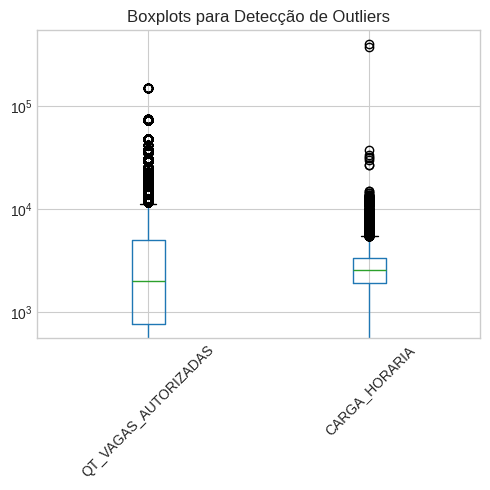

In [ ]:
# Boxplot para visualizar distribuição e outliers

plt.figure(figsize=(5, 5))
df[['QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA']].boxplot()
plt.title('Boxplots para Detecção de Outliers')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Função para remover outliers usando IQR em uma coluna específica

def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - multiplier * IQR
    upper_limit = Q3 + multiplier * IQR
    
    print(f"Coluna {column}:")
    print(f"  Limite inferior: {lower_limit}")
    print(f"  Limite superior: {upper_limit}")
    print(f"  Outliers: {((df[column] < lower_limit) | (df[column] > upper_limit)).sum()} de {len(df)} registros")
    
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

df_clean = df.copy()

print("Removendo outliers em QT_VAGAS_AUTORIZADAS...")
df_clean = remove_outliers_iqr(df_clean, 'QT_VAGAS_AUTORIZADAS')

print("\nRemovendo outliers em CARGA_HORARIA...")
df_clean = remove_outliers_iqr(df_clean, 'CARGA_HORARIA')

print(f"\nTamanho do DataFrame original: {len(df)}")
print(f"Tamanho do DataFrame após remover outliers: {len(df_clean)}")
print(f"Registros removidos: {len(df) - len(df_clean)} ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")

df = df_clean

Removendo outliers em QT_VAGAS_AUTORIZADAS...
Coluna QT_VAGAS_AUTORIZADAS:
  Limite inferior: -5590.0
  Limite superior: 11354.0
  Outliers: 75854 de 902646 registros

Removendo outliers em CARGA_HORARIA...
Coluna CARGA_HORARIA:
  Limite inferior: -180.0
  Limite superior: 5420.0
  Outliers: 1501 de 826792 registros

Tamanho do DataFrame original: 902646
Tamanho do DataFrame após remover outliers: 825291
Registros removidos: 77355 (8.57%)


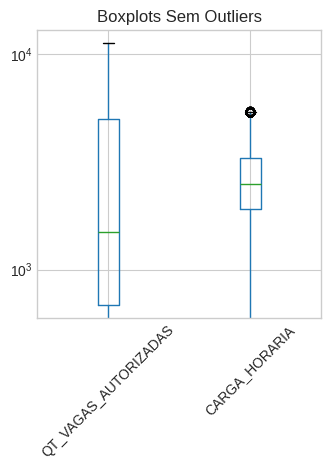

In [104]:
# Visualizar boxplot após remover outliers

plt.subplot(1, 2, 2)
df_clean[['QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA']].boxplot()
plt.title('Boxplots Sem Outliers')
plt.yscale('log')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [105]:
# Remover colunas não necessárias

columns_to_remove = ['CODIGO_IES', 'NOME_IES', 'CODIGO_CURSO', 'CODIGO_MUNICIPIO']

df = df.drop(columns=columns_to_remove)

In [106]:
df.columns

Index(['CATEGORIA_ADMINISTRATIVA', 'ORGANIZACAO_ACADEMICA', 'NOME_CURSO',
       'GRAU', 'MODALIDADE', 'SITUACAO_CURSO', 'QT_VAGAS_AUTORIZADAS',
       'CARGA_HORARIA', 'MUNICIPIO', 'UF', 'REGIAO'],
      dtype='object')

In [107]:
# Análise de valores únicos por coluna

for col in df.columns:
    print(f"\nColuna: {col}")
    print(f"Valores únicos: {df[col].nunique()}")
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        print(f"Exemplos: {df[col].unique()[:30]}")


Coluna: CATEGORIA_ADMINISTRATIVA
Valores únicos: 6
Exemplos: ['Privada com fins lucrativos' 'Privada sem fins lucrativos'
 'Pública Municipal' 'Pública Federal' 'Pública Estadual' 'Especial']

Coluna: ORGANIZACAO_ACADEMICA
Valores únicos: 6
Exemplos: ['Centro Universitário' 'Universidade' 'Faculdade'
 'Instituto Federal de Educação, Ciência e Tecnologia'
 'Centro Federal de Educação Tecnológica'
 'Instituição Especialmente Credenciada para oferta de cursos lato sensu']

Coluna: NOME_CURSO
Valores únicos: 2195
Exemplos: ['ENGENHARIA AGRONÔMICA' 'LETRAS' 'GEOGRAFIA' 'EDUCAÇÃO FÍSICA'
 'SERVIÇOS PENAIS' 'GESTÃO COMERCIAL'
 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS'
 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO' 'DANÇA' 'AGROCOMPUTAÇÃO'
 'CIÊNCIAS CONTÁBEIS' 'ADMINISTRAÇÃO' 'ARTES VISUAIS' 'JOGOS DIGITAIS'
 'SERVIÇOS JURÍDICOS, CARTORÁRIOS E NOTARIAIS' 'LETRAS - ALEMÃO'
 'LETRAS - PORTUGUÊS E INGLÊS' 'PROCESSOS GERENCIAIS'
 'ENGENHARIA DE PRODUÇÃO' 'LETRAS - LIBRAS' 'SISTEMAS DE INFORMAÇÃO'
 'COMÉRCI

In [108]:
# Remover cursos com categoria REGIÃO = IGNORADO/EXTERIOR

df = df[df['REGIAO'] != 'IGNORADO/EXTERIOR']

# Remover cursos com UF = ZZ 

df = df[df['UF'] != 'ZZ']

In [109]:
df['REGIAO'].unique()

array(['SUDESTE', 'NORDESTE', 'SUL', 'CENTRO-OESTE', 'NORTE'],
      dtype=object)

In [110]:
df['UF'].unique()

array(['SP', 'PB', 'SE', 'PR', 'PE', 'RN', 'SC', 'RJ', 'RS', 'BA', 'MG',
       'MT', 'CE', 'PA', 'RO', 'TO', 'AM', 'GO', 'ES', 'AC', 'MA', 'AL',
       'DF', 'MS', 'PI', 'RR', 'AP'], dtype=object)

In [111]:
# Definir a nova ordem das colunas

sort_columns = [ 'NOME_CURSO', 'GRAU', 'MODALIDADE', 
                'CATEGORIA_ADMINISTRATIVA', 'ORGANIZACAO_ACADEMICA',
                'MUNICIPIO', 'UF', 'REGIAO', 'QT_VAGAS_AUTORIZADAS',
                'CARGA_HORARIA', 'SITUACAO_CURSO']

df = df[sort_columns]

In [112]:
df.head()

,NOME_CURSO,GRAU,MODALIDADE,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,MUNICIPIO,UF,REGIAO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,SITUACAO_CURSO
0,ENGENHARIA AGRONÔMICA,Bacharelado,Educação a Distância,Privada com fins lucrativos,Centro Universitário,Presidente Prudente,SP,SUDESTE,1000,4400,Em atividade
1,LETRAS,Licenciatura,Educação a Distância,Privada com fins lucrativos,Centro Universitário,Sousa,PB,NORDESTE,3000,3992,Em atividade
2,GEOGRAFIA,Licenciatura,Educação a Distância,Privada com fins lucrativos,Centro Universitário,Aracaju,SE,NORDESTE,7620,3500,Em atividade
3,EDUCAÇÃO FÍSICA,Bacharelado,Educação a Distância,Privada com fins lucrativos,Universidade,Lapa,PR,SUL,1200,3200,Em atividade
4,SERVIÇOS PENAIS,Tecnológico,Educação a Distância,Privada com fins lucrativos,Centro Universitário,Belo Jardim,PE,NORDESTE,1500,1980,Em atividade


In [113]:
# Salvar o DataFrame limpo em um novo arquivo CSV

df.to_csv('/home/willemromao/Downloads/TI/projetos_graduacao/ciencia_de_dados/cursos_graduacao_brasil/data/clean.csv', index=False)

In [114]:
# Estatísticas descritivas do DataFrame limpo

df.describe(include='all')

,NOME_CURSO,GRAU,MODALIDADE,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,MUNICIPIO,UF,REGIAO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,SITUACAO_CURSO
count,824759,824759,824759,824759,824759,824759,824759,824759,824759.000000,824759.000000,824759
unique,2195,5,2,6,6,3312,27,5,NaN,NaN,3
top,ADMINISTRAÇÃO,Tecnológico,Educação a Distância,Privada com fins lucrativos,Centro Universitário,São Paulo,SP,SUDESTE,NaN,NaN,Em atividade
freq,17744,429786,753480,684669,439705,10344,151501,315855,NaN,NaN,775573
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2831.561331,2658.709687,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907.244314,858.467352,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687.000000,1920.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.000000,2505.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000,3304.000000,NaN


In [ ]:
# Criar relatório de análise exploratória de dados com ydata_profiling

profile = ProfileReport(df, title="Ánalise Exploratória de Dados - Cursos de Graduação Brasil")

profile.to_file("relatorio_dados.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:13<00:00,  1.26s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [116]:
# Gráficos para análise das variáveis categóricas

# Definir estilo visual
plt.style.use('seaborn-v0_8-whitegrid')

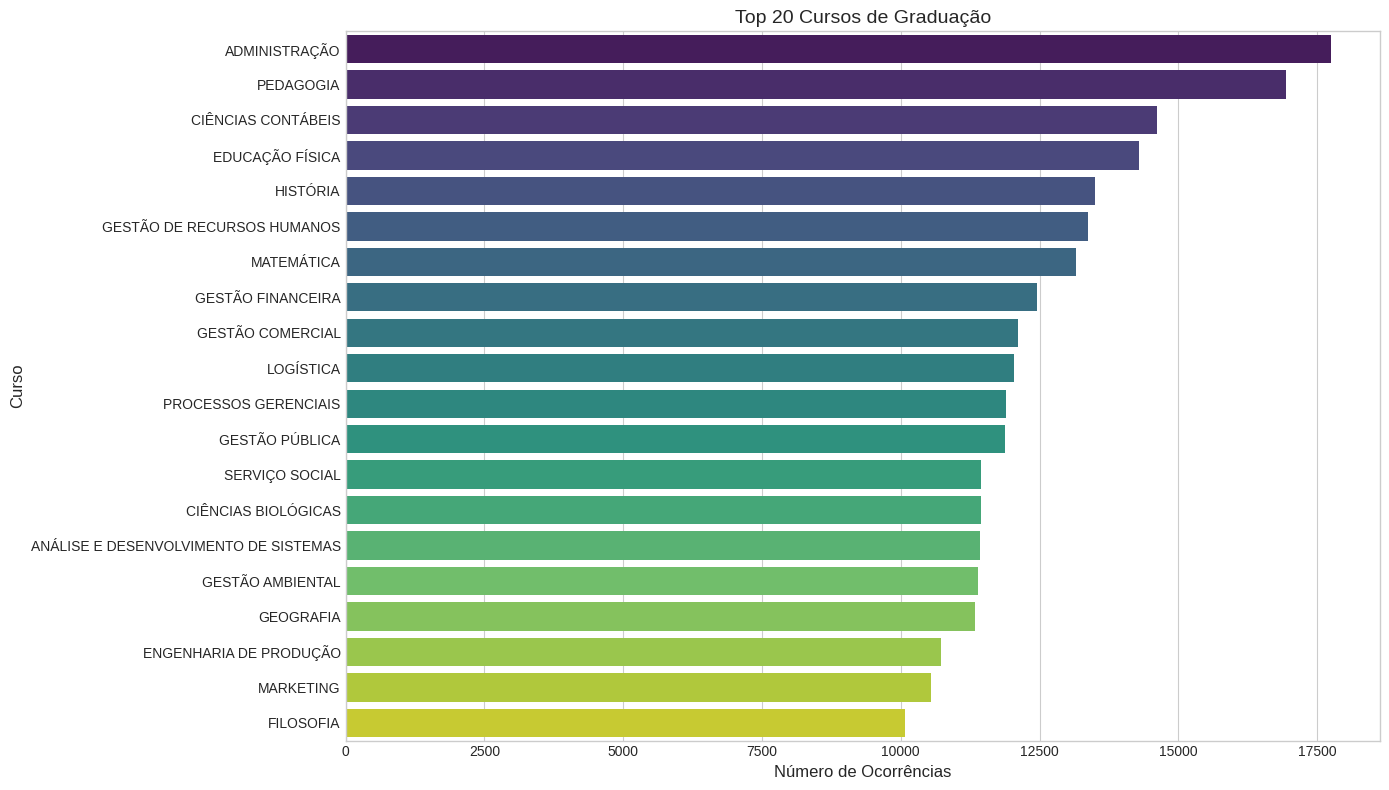

In [117]:
# 1. NOME_CURSO

plt.figure(figsize=(14, 8))
top_cursos = df['NOME_CURSO'].value_counts().head(20)
sns.barplot(x=top_cursos.values, y=top_cursos.index, hue=top_cursos.index, legend=False, palette='viridis')
plt.title('Top 20 Cursos de Graduação', fontsize=14)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Curso', fontsize=12)
plt.tight_layout()
plt.show()

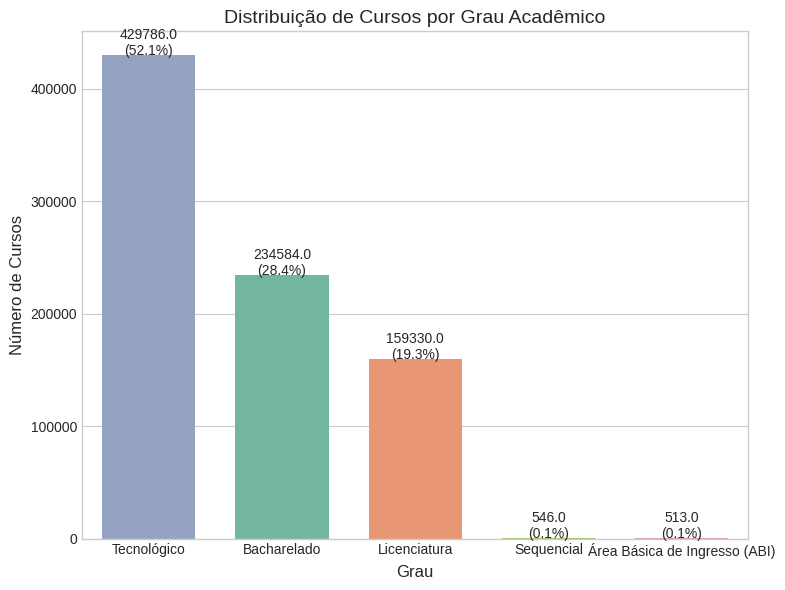

In [ ]:
# 2. GRAU

plt.figure(figsize=(8, 6))
ordem_grau = df['GRAU'].value_counts().index
bar_width = 0.7 
ax = sns.countplot(data=df, x='GRAU', hue='GRAU', legend=False, order=ordem_grau, palette='Set2', width=bar_width)
plt.title('Distribuição de Cursos por Grau Acadêmico', fontsize=14)
plt.xlabel('Grau', fontsize=12)
plt.ylabel('Número de Cursos', fontsize=12)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{height}\n({height/total:.1%})',
            ha="center", fontsize=10)

plt.tight_layout()
plt.show()

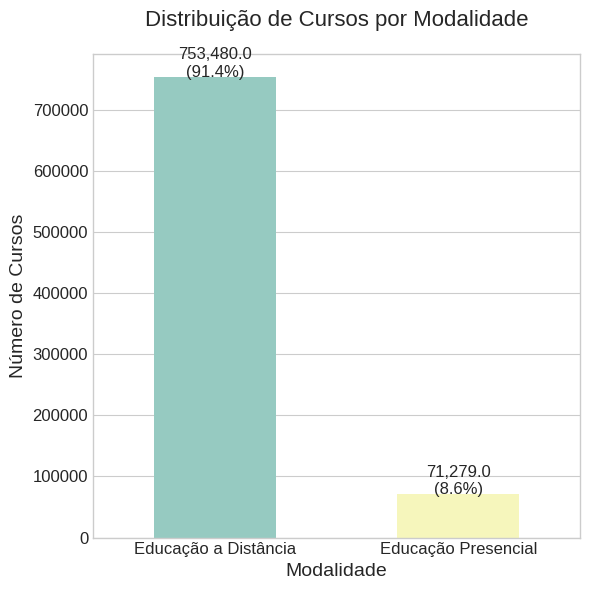

In [119]:
# 3. MODALIDADE

plt.figure(figsize=(6, 6))
ordem_modalidade = df['MODALIDADE'].value_counts().index
ax = sns.countplot(data=df, x='MODALIDADE', hue='MODALIDADE', legend=False, 
                  order=ordem_modalidade, palette='Set3', width=0.5)
plt.title('Distribuição de Cursos por Modalidade', fontsize=16, pad=20)
plt.xlabel('Modalidade', fontsize=14)
plt.ylabel('Número de Cursos', fontsize=14)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{height:,}\n({height/total:.1%})',
            ha="center", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

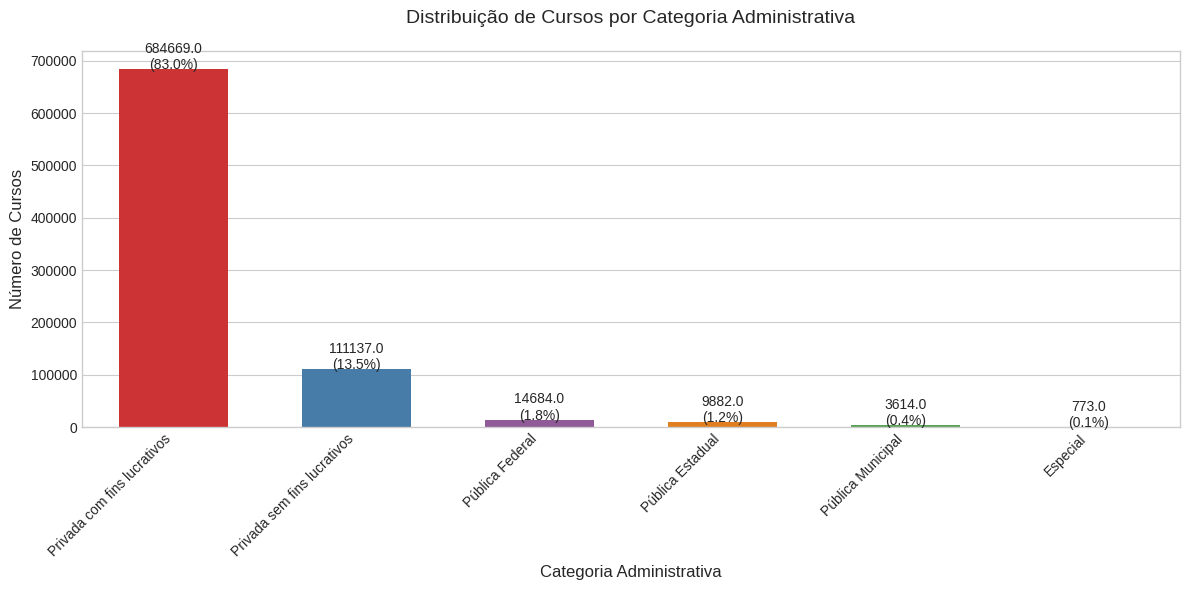

In [ ]:
# 4. CATEGORIA_ADMINISTRATIVA

plt.figure(figsize=(12, 6))
ordem_cat_adm = df['CATEGORIA_ADMINISTRATIVA'].value_counts().index
ax = sns.countplot(data=df, x='CATEGORIA_ADMINISTRATIVA', hue='CATEGORIA_ADMINISTRATIVA', 
                  legend=False, order=ordem_cat_adm, palette='Set1', width=0.6)  
plt.title('Distribuição de Cursos por Categoria Administrativa', fontsize=14, pad=20)
plt.xlabel('Categoria Administrativa', fontsize=12)
plt.ylabel('Número de Cursos', fontsize=12)
plt.xticks(rotation=45, ha='right')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{height}\n({height/total:.1%})',
            ha="center", fontsize=10)

plt.subplots_adjust(wspace=0.2) 
plt.tight_layout()
plt.show()

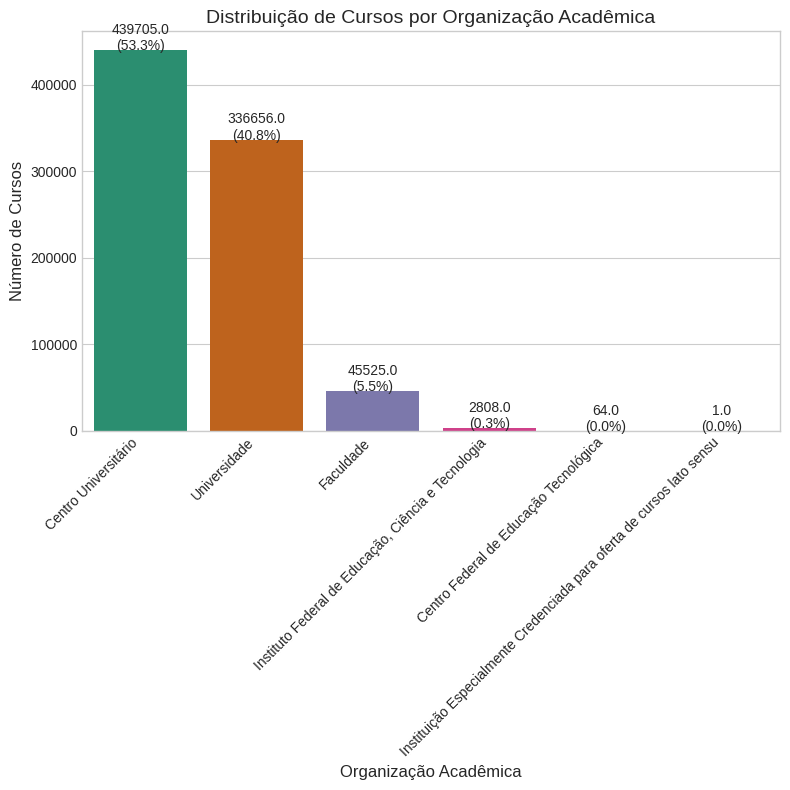

In [ ]:
# 5. ORGANIZACAO_ACADEMICA

plt.figure(figsize=(8, 8))
ordem_org_acad = df['ORGANIZACAO_ACADEMICA'].value_counts().index
ax = sns.countplot(data=df, x='ORGANIZACAO_ACADEMICA', hue='ORGANIZACAO_ACADEMICA', 
                  legend=False, order=ordem_org_acad, palette='Dark2')
plt.title('Distribuição de Cursos por Organização Acadêmica', fontsize=14)
plt.xlabel('Organização Acadêmica', fontsize=12)
plt.ylabel('Número de Cursos', fontsize=12)
plt.xticks(rotation=45, ha='right')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{height}\n({height/total:.1%})',
            ha="center", fontsize=10)

plt.tight_layout()
plt.show()

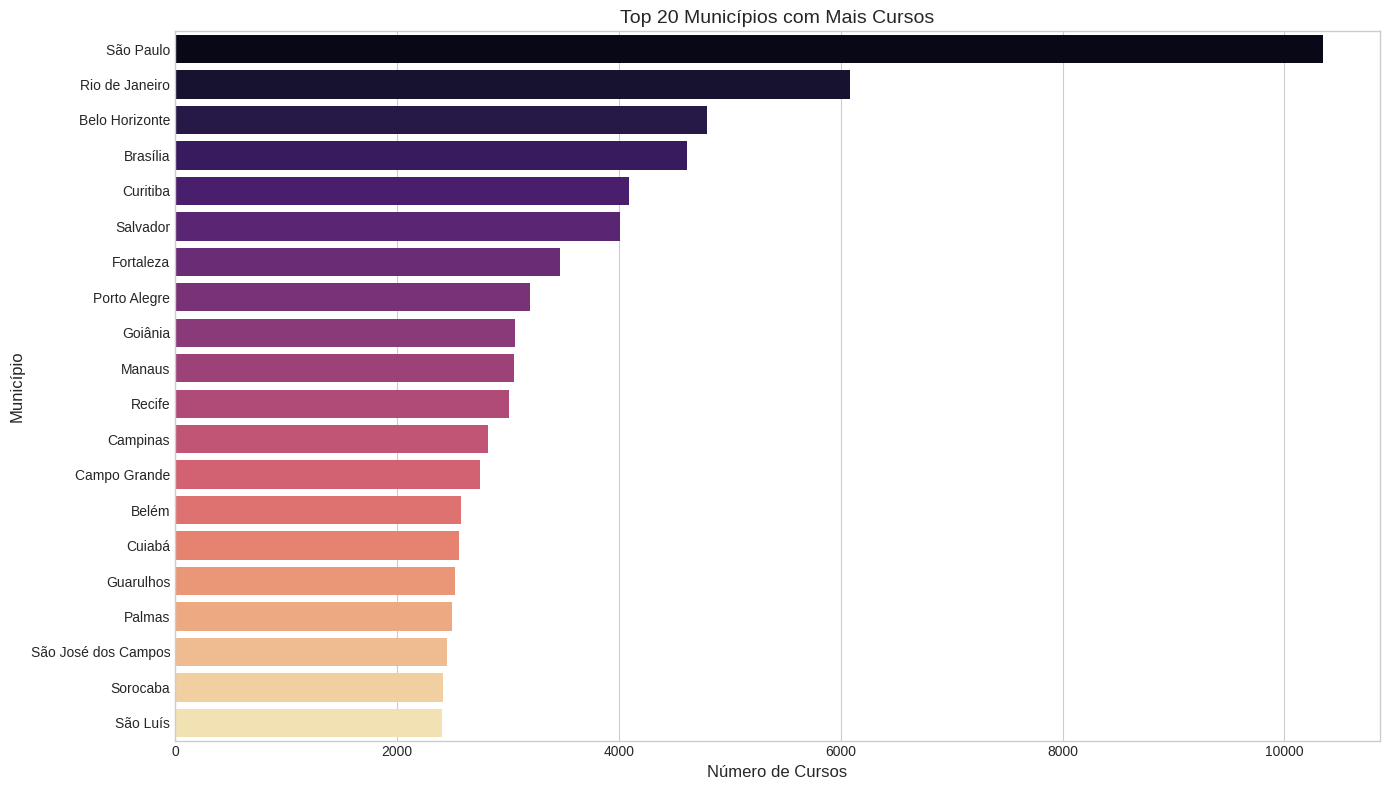

In [122]:
# 6. MUNICIPIO (muitas categorias - top 20)

plt.figure(figsize=(14, 8))
top_municipios = df['MUNICIPIO'].value_counts().head(20)
sns.barplot(x=top_municipios.values, y=top_municipios.index, 
           hue=top_municipios.index, legend=False, palette='magma')
plt.title('Top 20 Municípios com Mais Cursos', fontsize=14)
plt.xlabel('Número de Cursos', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.tight_layout()
plt.show()

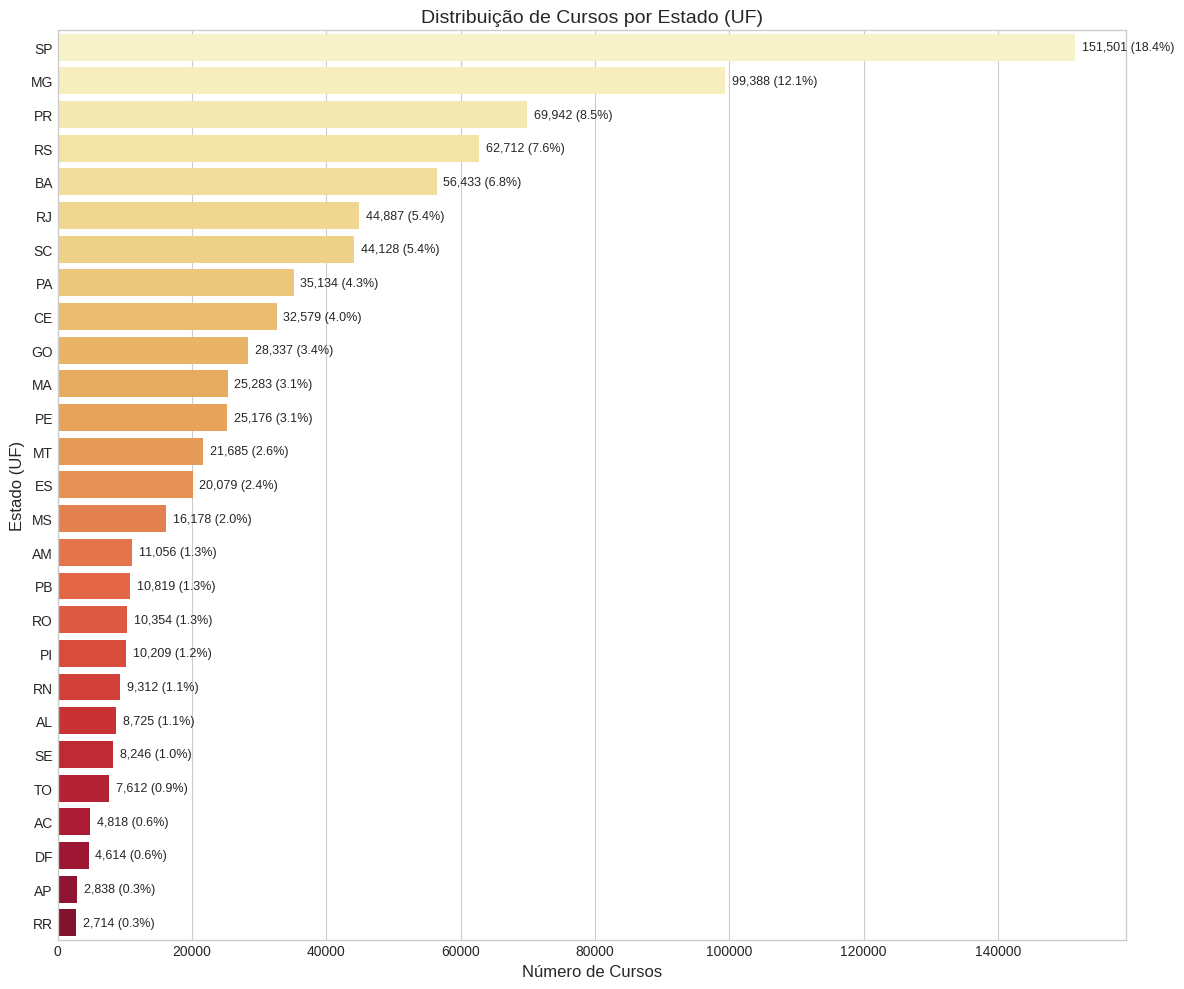

In [ ]:
# 7. UF (visualização em mapa)

plt.figure(figsize=(12, 10))
uf_counts = df['UF'].value_counts()

ax = sns.barplot(y=uf_counts.index, x=uf_counts.values, 
                hue=uf_counts.index, legend=False, palette='YlOrRd')
plt.title('Distribuição de Cursos por Estado (UF)', fontsize=14)
plt.ylabel('Estado (UF)', fontsize=12)
plt.xlabel('Número de Cursos', fontsize=12)

total = len(df)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1000, p.get_y() + p.get_height()/2, 
            f'{int(width):,} ({width/total:.1%})',
            ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.show()

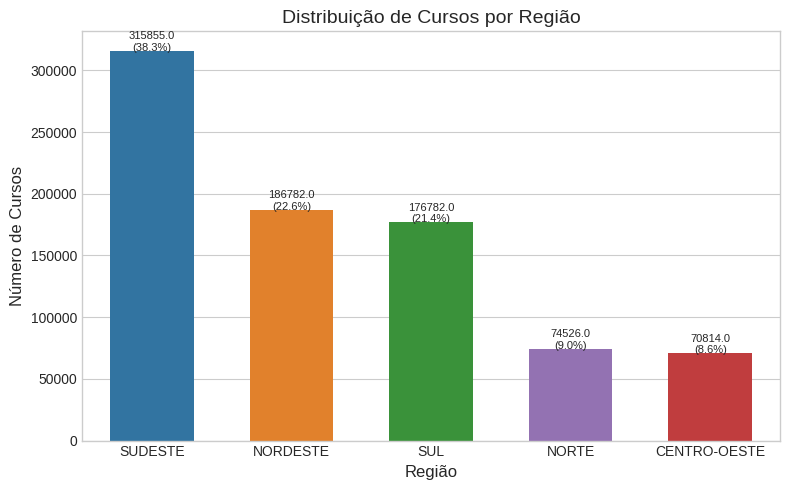

In [ ]:
# 8. REGIAO

plt.figure(figsize=(8, 5))
ordem_regiao = df['REGIAO'].value_counts().index
ax = sns.countplot(data=df, x='REGIAO', hue='REGIAO', legend=False, 
                  order=ordem_regiao, palette='tab10', width=0.6)
plt.title('Distribuição de Cursos por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Número de Cursos', fontsize=12)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{height}\n({height/total:.1%})',
            ha="center", fontsize=8)

plt.tight_layout()
plt.show()

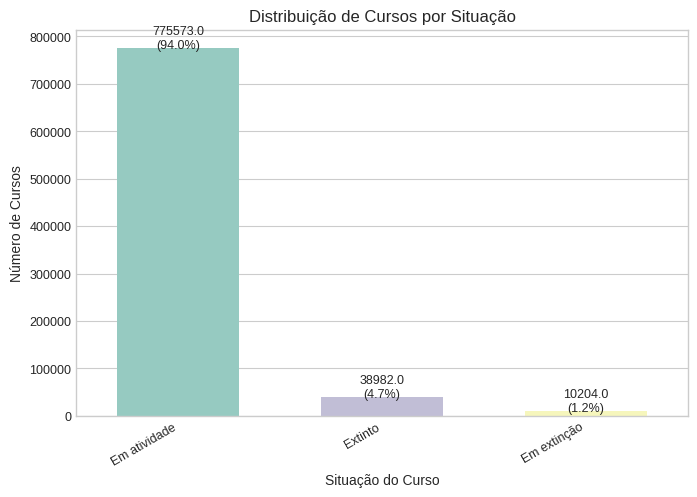

In [ ]:
# 9. SITUACAO_CURSO

plt.figure(figsize=(7, 5))
ordem_situacao = df['SITUACAO_CURSO'].value_counts().index
ax = sns.countplot(data=df, x='SITUACAO_CURSO', hue='SITUACAO_CURSO', 
                  legend=False, order=ordem_situacao, palette='Set3', width=0.6)  
plt.title('Distribuição de Cursos por Situação', fontsize=12)
plt.xlabel('Situação do Curso', fontsize=10)
plt.ylabel('Número de Cursos', fontsize=10)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            f'{height}\n({height/total:.1%})',
            ha="center", fontsize=9)

plt.xticks(rotation=30, ha='right', fontsize=9) 
plt.yticks(fontsize=9)  
plt.tight_layout(pad=0.8)
plt.show()

Text(0.5, 1.0, 'Nuvem de Palavras - Nomes dos Cursos')

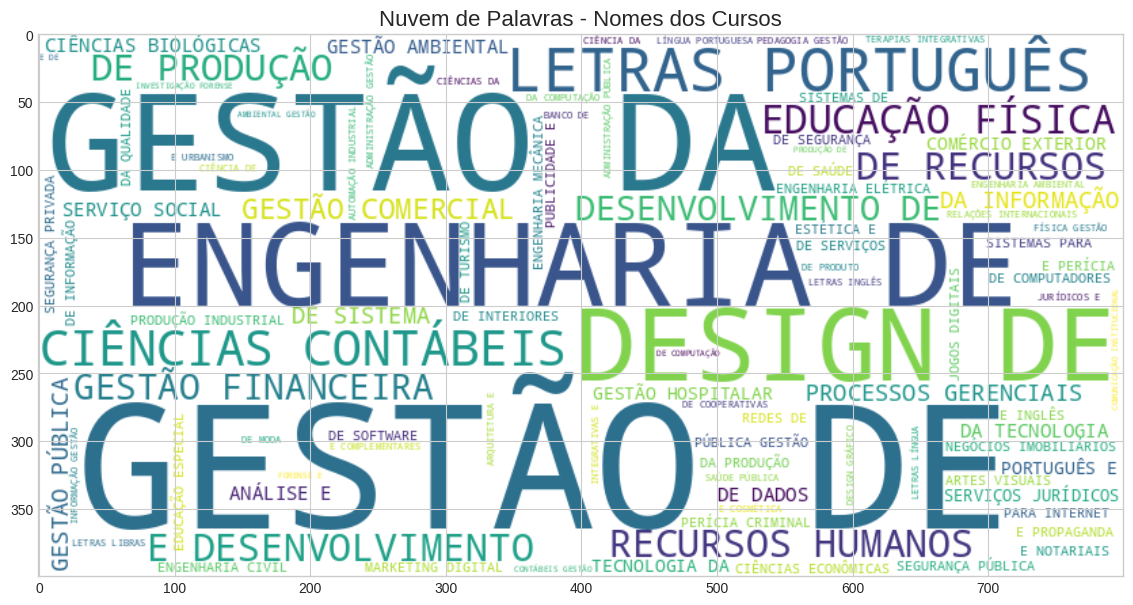

In [126]:
# Nuvem de palavras para nomes dos cursos

plt.figure(figsize=(14, 10))
texto = ' '.join(df['NOME_CURSO'])
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     colormap='viridis', 
                     max_words=100,
                     contour_width=3,
                     contour_color='steelblue').generate(texto)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras - Nomes dos Cursos', fontsize=16)

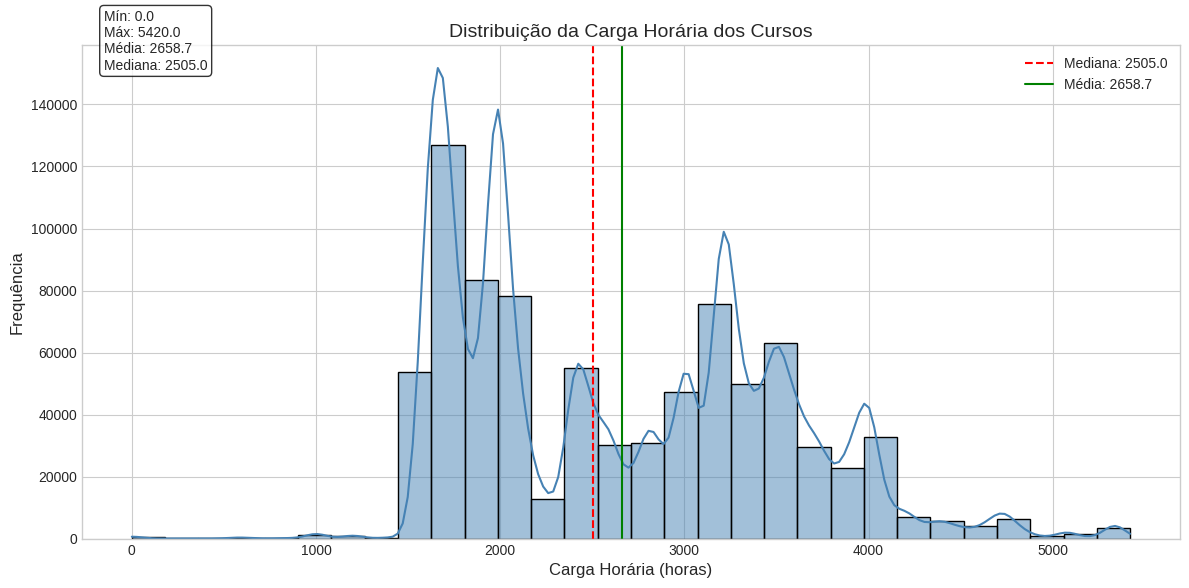

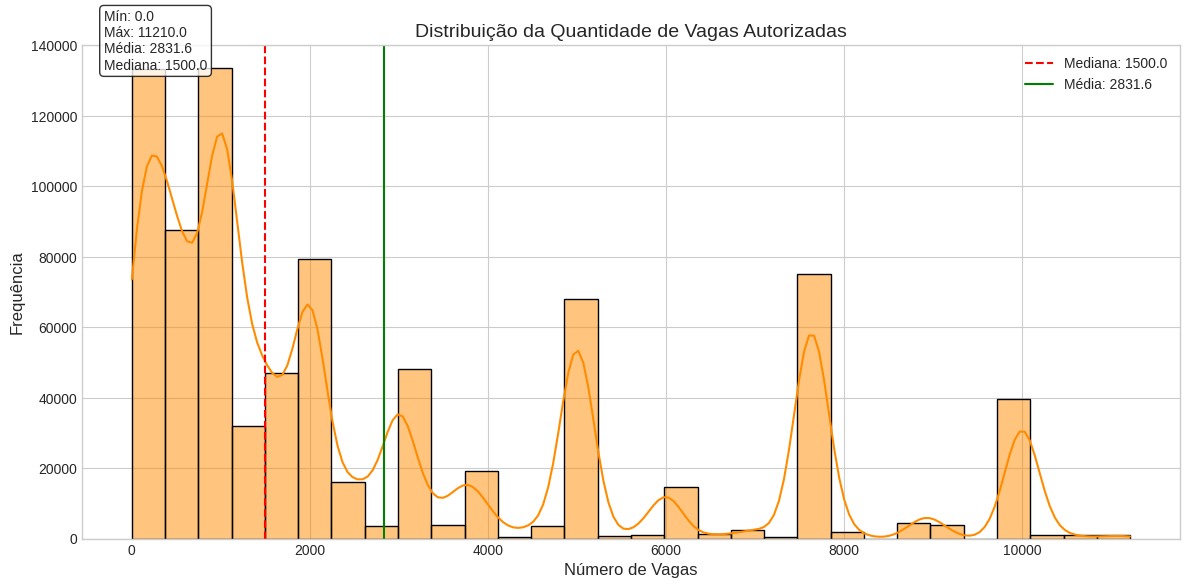

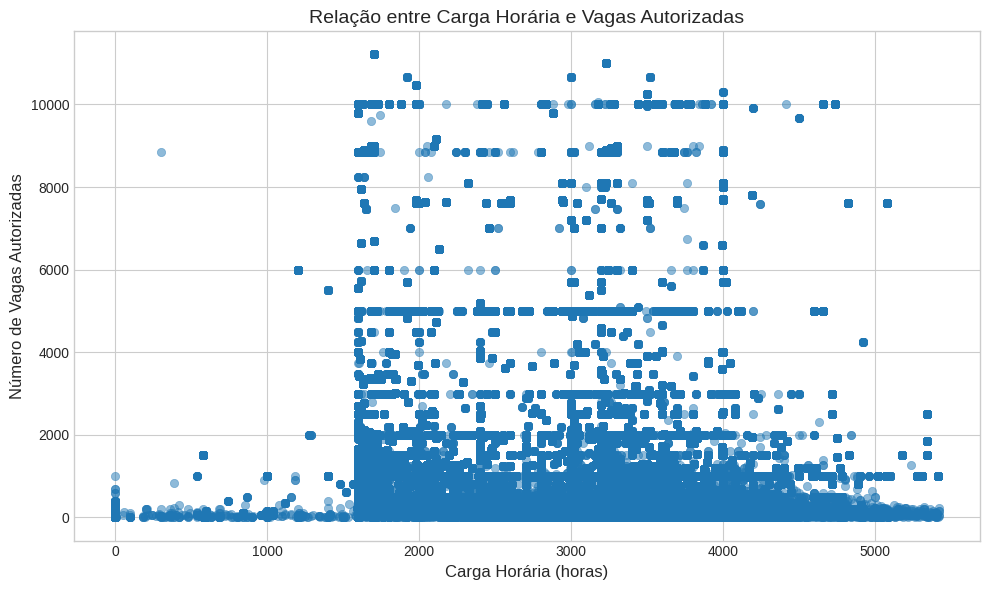

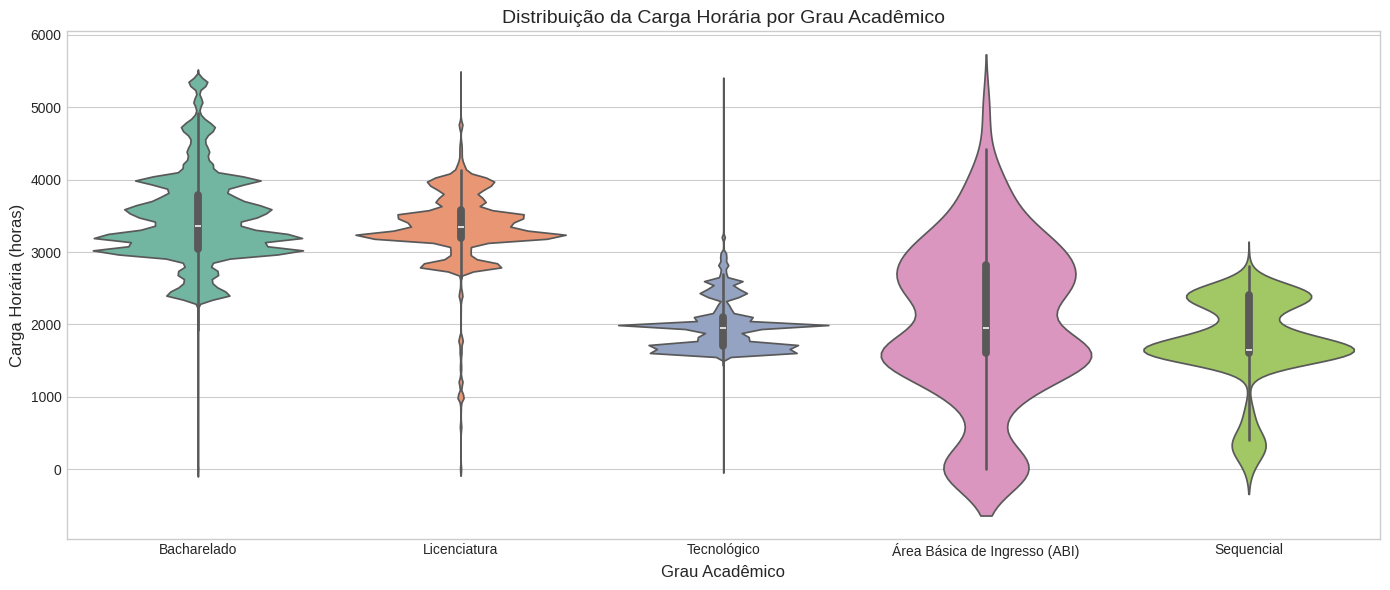

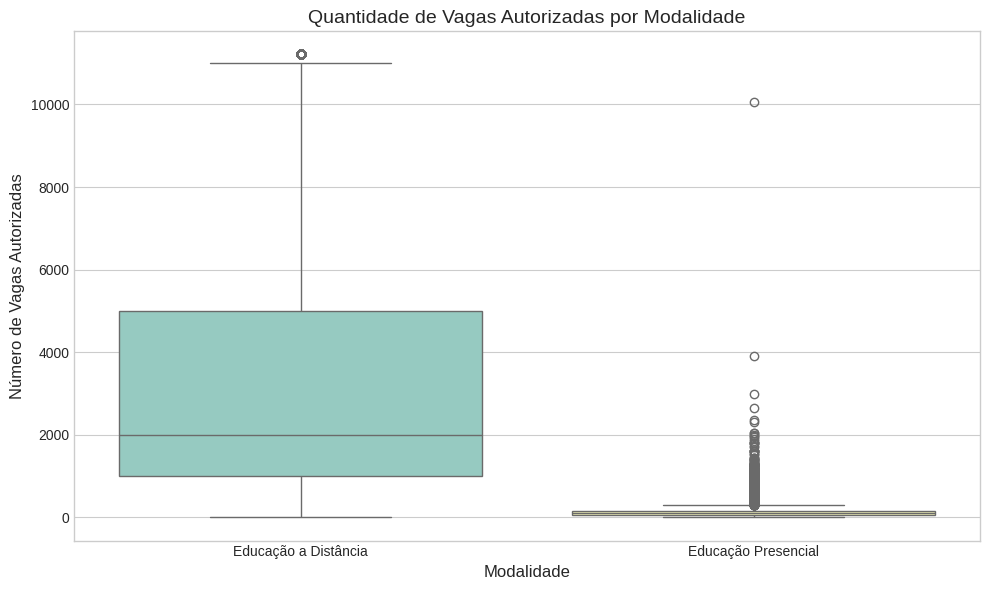

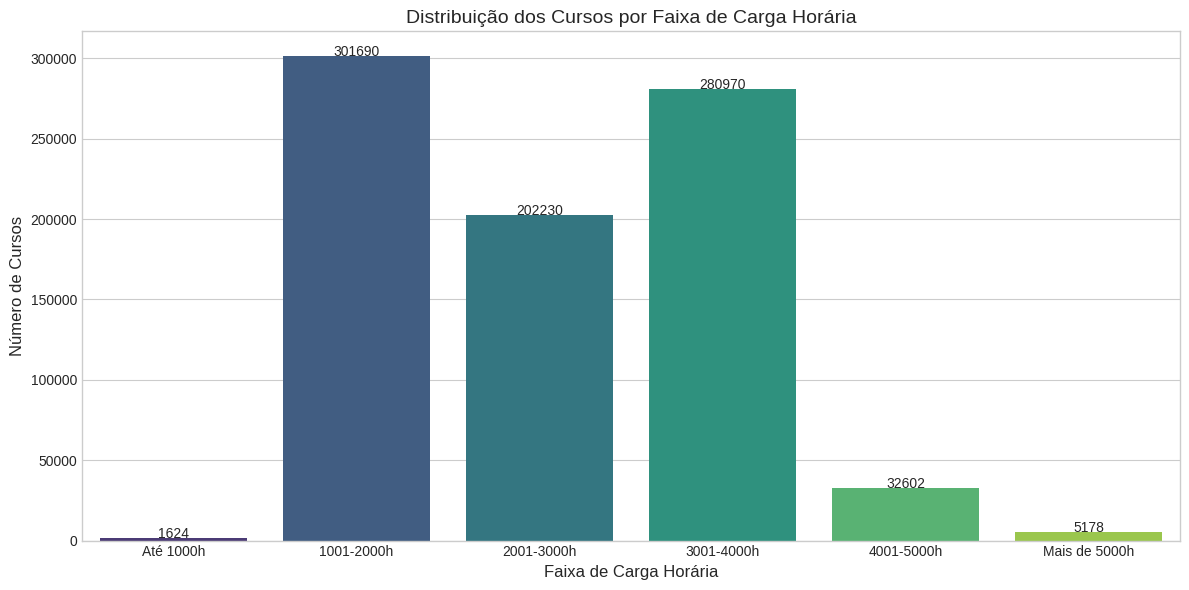

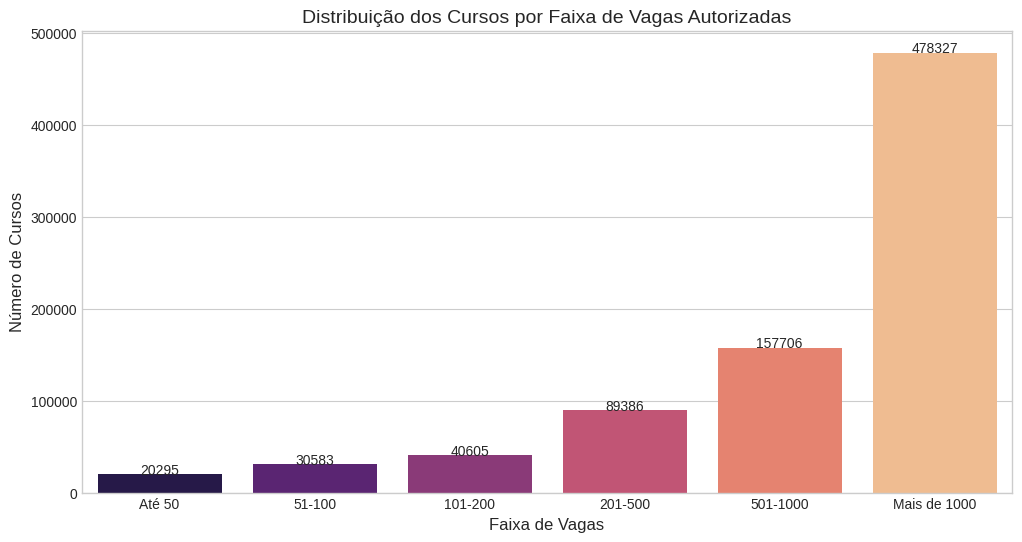

In [ ]:
# Gráficos para análise das variáveis numéricas

plt.style.use('seaborn-v0_8-whitegrid')

# Histograma para CARGA_HORARIA
plt.figure(figsize=(12, 6))
sns.histplot(df['CARGA_HORARIA'], kde=True, bins=30, color='steelblue')
plt.title('Distribuição da Carga Horária dos Cursos', fontsize=14)
plt.xlabel('Carga Horária (horas)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.axvline(df['CARGA_HORARIA'].median(), color='red', linestyle='--', 
            label=f'Mediana: {df["CARGA_HORARIA"].median()}')
plt.axvline(df['CARGA_HORARIA'].mean(), color='green', linestyle='-', 
            label=f'Média: {df["CARGA_HORARIA"].mean():.1f}')
plt.legend()

# Adicionar estatísticas no mesmo gráfico
stats = df['CARGA_HORARIA'].describe()
plt.text(0.02, 0.95, 
         f"Mín: {stats['min']}\nMáx: {stats['max']}\nMédia: {stats['mean']:.1f}\nMediana: {stats['50%']}", 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

# Histograma para QT_VAGAS_AUTORIZADAS
plt.figure(figsize=(12, 6))
sns.histplot(df['QT_VAGAS_AUTORIZADAS'], kde=True, bins=30, color='darkorange')
plt.title('Distribuição da Quantidade de Vagas Autorizadas', fontsize=14)
plt.xlabel('Número de Vagas', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.axvline(df['QT_VAGAS_AUTORIZADAS'].median(), color='red', linestyle='--', 
            label=f'Mediana: {df["QT_VAGAS_AUTORIZADAS"].median()}')
plt.axvline(df['QT_VAGAS_AUTORIZADAS'].mean(), color='green', linestyle='-', 
            label=f'Média: {df["QT_VAGAS_AUTORIZADAS"].mean():.1f}')
plt.legend()

# Adicionar estatísticas no mesmo gráfico
stats = df['QT_VAGAS_AUTORIZADAS'].describe()
plt.text(0.02, 0.95, 
         f"Mín: {stats['min']}\nMáx: {stats['max']}\nMédia: {stats['mean']:.1f}\nMediana: {stats['50%']}", 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

# Scatter plot relacionando as duas variáveis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CARGA_HORARIA', y='QT_VAGAS_AUTORIZADAS', data=df, 
                alpha=0.5, edgecolor=None)
plt.title('Relação entre Carga Horária e Vagas Autorizadas', fontsize=14)
plt.xlabel('Carga Horária (horas)', fontsize=12)
plt.ylabel('Número de Vagas Autorizadas', fontsize=12)
plt.tight_layout()
plt.show()

# Violinplot para visualizar a distribuição por GRAU
plt.figure(figsize=(14, 6))
sns.violinplot(x='GRAU', y='CARGA_HORARIA', data=df, hue='GRAU', legend=False, palette='Set2')
plt.title('Distribuição da Carga Horária por Grau Acadêmico', fontsize=14)
plt.xlabel('Grau Acadêmico', fontsize=12)
plt.ylabel('Carga Horária (horas)', fontsize=12)
plt.tight_layout()
plt.show()

# Boxplot para mostrar a quantidade de vagas por modalidade
plt.figure(figsize=(10, 6))
sns.boxplot(x='MODALIDADE', y='QT_VAGAS_AUTORIZADAS', data=df, hue='MODALIDADE', legend=False, palette='Set3')
plt.title('Quantidade de Vagas Autorizadas por Modalidade', fontsize=14)
plt.xlabel('Modalidade', fontsize=12)
plt.ylabel('Número de Vagas Autorizadas', fontsize=12)
plt.tight_layout()
plt.show()

# Distribuição das faixas de carga horária
plt.figure(figsize=(12, 6))
faixas = pd.cut(df['CARGA_HORARIA'], bins=[0, 1000, 2000, 3000, 4000, 5000, 10000], 
                labels=['Até 1000h', '1001-2000h', '2001-3000h', '3001-4000h', '4001-5000h', 'Mais de 5000h'])
contagem = faixas.value_counts().sort_index()
ax = sns.barplot(x=contagem.index, y=contagem.values, hue=contagem.index, legend=False, palette='viridis')
plt.title('Distribuição dos Cursos por Faixa de Carga Horária', fontsize=14)
plt.xlabel('Faixa de Carga Horária', fontsize=12)
plt.ylabel('Número de Cursos', fontsize=12)

for i, v in enumerate(contagem.values):
    ax.text(i, v + 10, str(v), ha='center')

plt.tight_layout()
plt.show()

# Distribuição das faixas de vagas autorizadas
plt.figure(figsize=(12, 6))
faixas = pd.cut(df['QT_VAGAS_AUTORIZADAS'], bins=[0, 50, 100, 200, 500, 1000, 10000], 
                labels=['Até 50', '51-100', '101-200', '201-500', '501-1000', 'Mais de 1000'])
contagem = faixas.value_counts().sort_index()
ax = sns.barplot(x=contagem.index, y=contagem.values, hue=contagem.index, legend=False, palette='magma')
plt.title('Distribuição dos Cursos por Faixa de Vagas Autorizadas', fontsize=14)
plt.xlabel('Faixa de Vagas', fontsize=12)
plt.ylabel('Número de Cursos', fontsize=12)

for i, v in enumerate(contagem.values):
    ax.text(i, v + 10, str(v), ha='center')

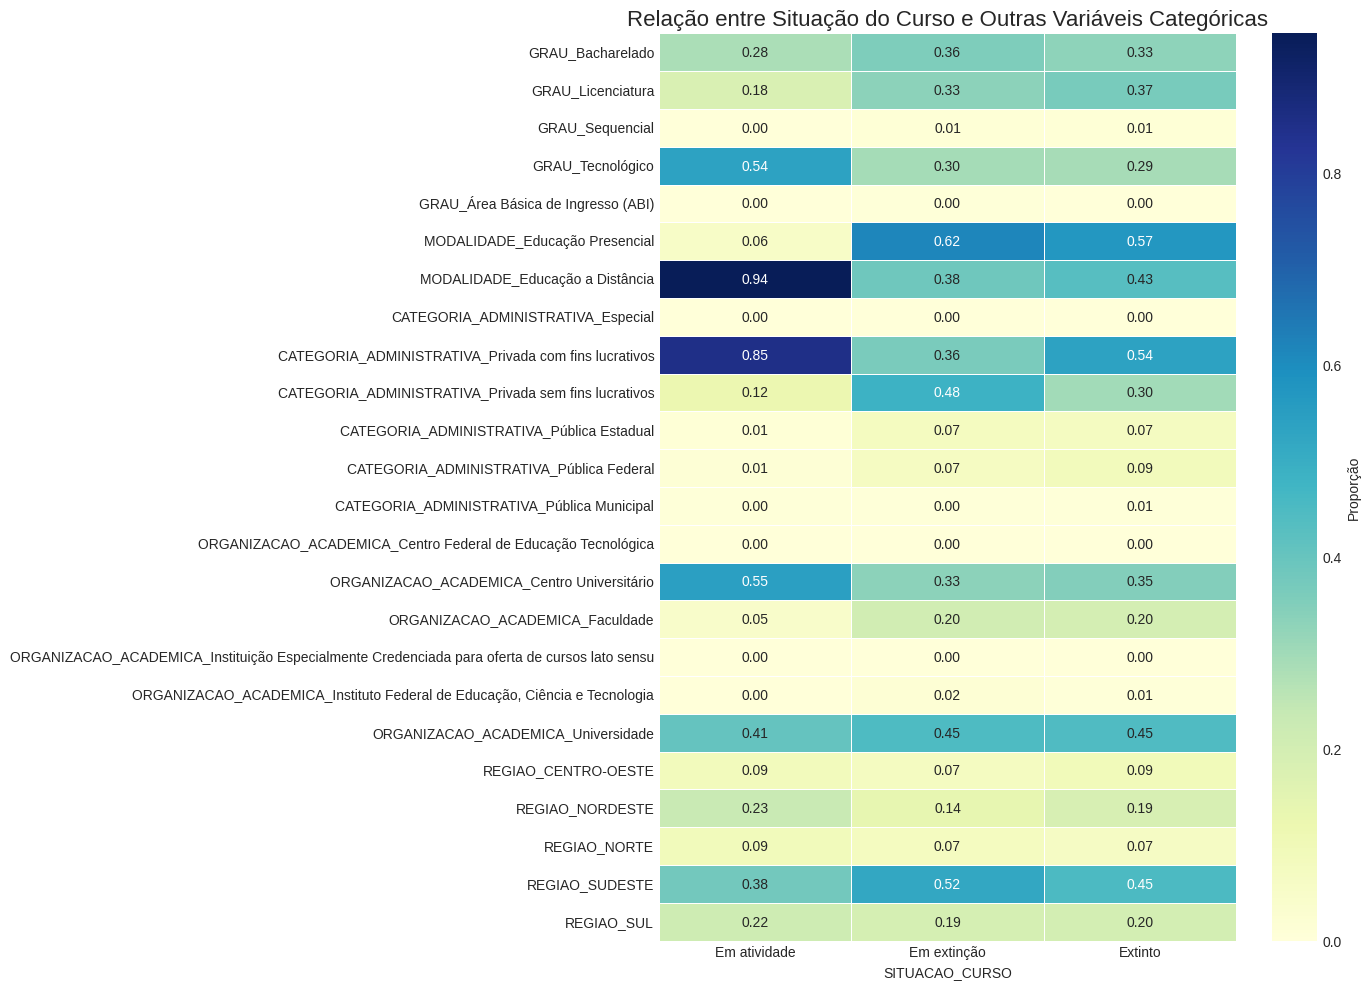

In [ ]:
# Heatmap para análise da Situação Curso

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(14, 10))
vars_categoricas = ['GRAU', 'MODALIDADE', 'CATEGORIA_ADMINISTRATIVA', 'ORGANIZACAO_ACADEMICA', 'REGIAO']
df_heatmap = pd.DataFrame()

for var in vars_categoricas:
    crosstab = pd.crosstab(df['SITUACAO_CURSO'], df[var], normalize='index')
    
    crosstab.columns = [f"{var}_{col}" for col in crosstab.columns]
    
    if df_heatmap.empty:
        df_heatmap = crosstab
    else:
        df_heatmap = pd.concat([df_heatmap, crosstab], axis=1)

df_heatmap = df_heatmap.T

sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Proporção'})
plt.title('Relação entre Situação do Curso e Outras Variáveis Categóricas', fontsize=16)
plt.tight_layout()
plt.show()